In [243]:
import os, re, glob
from sklearn.model_selection import train_test_split
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [244]:
# training image master 경로
groups_folder_path = 'faces/'

In [245]:
# 구분할 이미지의 종류. 다현 or 예지 이므로 2개 짜리 list
categories = ["0", "1"]
num_classes = len(categories)

In [246]:
#얼굴 인식 캐스케이드 파일 읽는다
face_cascade = cv2.CascadeClassifier('haarcascade_frontface.xml')

In [247]:
# 사진 용량 감소를 위하여 크기를 128*128로 조정
image_w = 128
image_h = 128
  
X = []
Y = []

faces/0/iu.jpg


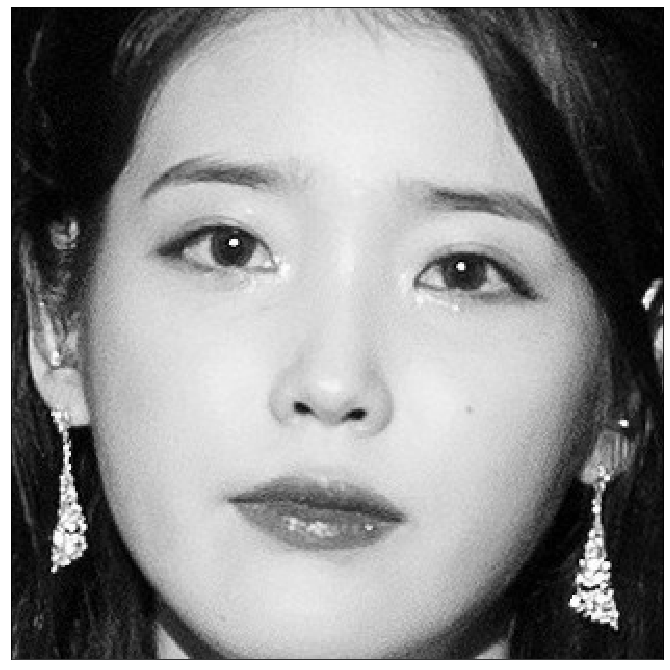

faces/1/han.jpg


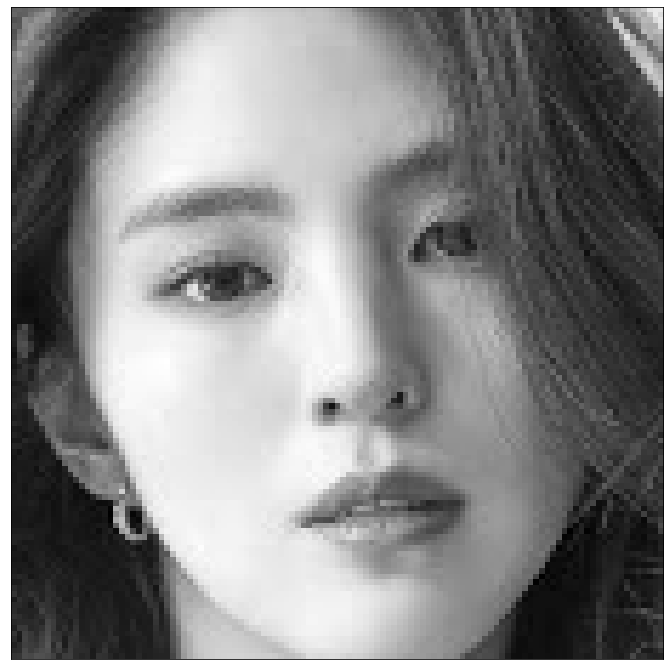

In [249]:
# 카테고리, 인덱스 라벨링
for idex, categorie in enumerate(categories):
    label = [0 for i in range(num_classes)]
    label[idex] = 1
    image_dir = groups_folder_path + categorie + '/'
    
    # image_dir 경로의 모든 파일들에 대하여 작업
    for top, dir, f in os.walk(image_dir):
        # 경로내 모든 파일에 대하여
        for filename in f:
            print(image_dir+filename)
            
            # 파일불러오기
            img = cv2.imread(image_dir+filename)
            
            # 불러온 파일 gray화
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            # gray 파일 얼굴인식
            faces = face_cascade.detectMultiScale(gray_img, 1.03, 5)
            
            # 인식 된 얼굴이 없으면 작업 넘기기
            if type(faces) == tuple:
                continue
            else:
              # 얼굴이 하나이면 얼굴부분 잘라내고 리사이즈 한 뒤 list에 추가
                if faces.shape[0] == 1:
                    for (x,y,w,h) in faces:
                        cropped = gray_img[y:y + h, x:x + w]
                    re_gray = cv2.resize(cropped, None, fx=image_w/cropped.shape[0], fy=image_h/cropped.shape[1])
                    
                    # 값을 0~1사이 값으로 표준화
                    X.append(re_gray/255)
                    Y.append(label)
            
            # 사진 편집 결과 출력
            plt.figure(figsize=(12,12))
            plt.imshow(cropped, cmap='gray')
            plt.xticks([]), plt.yticks([])
            plt.show()

In [250]:
X = np.array(X)
Y = np.array(Y)
print(X)
print(Y)

[[[0.03137255 0.03921569 0.02352941 ... 0.03137255 0.00392157 0.03529412]
  [0.02352941 0.03921569 0.01568627 ... 0.00784314 0.02352941 0.03529412]
  [0.01568627 0.03529412 0.03529412 ... 0.02745098 0.00784314 0.03137255]
  ...
  [0.1372549  0.16862745 0.07058824 ... 0.04313725 0.05882353 0.04313725]
  [0.29019608 0.21568627 0.12941176 ... 0.0745098  0.03529412 0.04705882]
  [0.36470588 0.16078431 0.07058824 ... 0.06666667 0.03921569 0.05098039]]

 [[0.34117647 0.34901961 0.34117647 ... 0.8        0.80784314 0.80784314]
  [0.35294118 0.3372549  0.33333333 ... 0.73333333 0.80392157 0.76470588]
  [0.30196078 0.30588235 0.40392157 ... 0.67843137 0.76862745 0.78823529]
  ...
  [0.1254902  0.14901961 0.21176471 ... 0.15686275 0.19607843 0.24313725]
  [0.15294118 0.16470588 0.23529412 ... 0.10980392 0.14117647 0.17647059]
  [0.18431373 0.18823529 0.24313725 ... 0.12941176 0.12156863 0.13333333]]

 [[0.03137255 0.03921569 0.02352941 ... 0.03137255 0.00392157 0.03529412]
  [0.02352941 0.039215

In [251]:
# training data와 test data로 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
xy = (X_train, X_test, Y_train, Y_test)
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)
print(X)
print(Y)

[[[0.03137255 0.03921569 0.02352941 ... 0.03137255 0.00392157 0.03529412]
  [0.02352941 0.03921569 0.01568627 ... 0.00784314 0.02352941 0.03529412]
  [0.01568627 0.03529412 0.03529412 ... 0.02745098 0.00784314 0.03137255]
  ...
  [0.1372549  0.16862745 0.07058824 ... 0.04313725 0.05882353 0.04313725]
  [0.29019608 0.21568627 0.12941176 ... 0.0745098  0.03529412 0.04705882]
  [0.36470588 0.16078431 0.07058824 ... 0.06666667 0.03921569 0.05098039]]

 [[0.03137255 0.03921569 0.02352941 ... 0.03137255 0.00392157 0.03529412]
  [0.02352941 0.03921569 0.01568627 ... 0.00784314 0.02352941 0.03529412]
  [0.01568627 0.03529412 0.03529412 ... 0.02745098 0.00784314 0.03137255]
  ...
  [0.1372549  0.16862745 0.07058824 ... 0.04313725 0.05882353 0.04313725]
  [0.29019608 0.21568627 0.12941176 ... 0.0745098  0.03529412 0.04705882]
  [0.36470588 0.16078431 0.07058824 ... 0.06666667 0.03921569 0.05098039]]

 [[0.34117647 0.34901961 0.34117647 ... 0.8        0.80784314 0.80784314]
  [0.35294118 0.337254

In [252]:
np.save('faces/image_data.npy', xy)